In [1]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
import cv2 as cv
from PIL import Image
from scipy.integrate import odeint
import scipy.optimize as optimize
from matplotlib.animation import FuncAnimation # animate by repeatedly calling a function
from IPython import display # manipulate notebook output

In [5]:
fig1 = plt.figure(figsize=(4,6))
#fig2 = plt.figure(figsize=(8,4))
line1, = plt.plot([])
line2, = plt.plot([])
plt.xlim(0, 1.6)
plt.ylim(0, 1.6)

#fig2 = plt.figure()

#Du = 10e-2
du, dv = 1, 1
eps, q, f = 0.2, 10e-3, 1.0 # Du controls the convergence of the reaction. It is a diffusion constant

def oregonator(r,t):
    u, v = r
    fu = (1/eps)*(u*(1-u) - ((u-q)/(u+q))*f*v + Du*du**2)
    fv = u - v + Du*dv**2
    return fu, fv
    
init = [0, 0]
t = np.linspace(0, 200, 10000)

Du_array = np.linspace(10e-6, 1, 100)
u_concentration, v_concentration = [], []
for i in range(len(Du_array)):
    Du = Du_array[i]
    A = odeint(oregonator, init, t)
    x, y = A.T
    u_concentration.append(x)
    v_concentration.append(y)
    

def animate(frame):
    line1.set_data([u_concentration[frame], v_concentration[frame]])
    #line2.set_data([t, x])
    


anim = FuncAnimation(fig1, animate, frames=len(Du_array), interval=30)
video = anim.to_html5_video()
plt.close()
display.HTML(video)   
    


In [132]:
#fig1 = plt.figure(figsize=(4,6))
fig2 = plt.figure(figsize=(8,4))
#line1, = plt.plot([])
line2, = plt.plot([])
line3, = plt.plot([])
plt.xlim(0, 20)
plt.ylim(0, 2)

#fig2 = plt.figure()

#Du = 10e-2
du, dv = 1, 1
eps, q, f = 0.2, 10e-3, 1.0 # Du controls the convergence of the reaction. It is a diffusion constant

def oregonator(r,t):
    u, v = r
    fu = (1/eps)*(u*(1-u) - ((u-q)/(u+q))*f*v + Du*du**2)
    fv = u - v + Du*dv**2
    return fu, fv
    
init = [0, 0]
t = np.linspace(0, 20, 10000)

Du_array = np.linspace(10e-8, 1, 1000)
u_concentration, v_concentration = [], []
for i in range(len(Du_array)):
    Du = Du_array[i]
    A = odeint(oregonator, init, t)
    x, y = A.T
    u_concentration.append(x)
    v_concentration.append(y)

def animate(frame):
    line2.set_data([t, u_concentration[frame]])
    line3.set_data([t, v_concentration[frame]])

anim = FuncAnimation(fig2, animate, frames=len(Du_array), interval=20)
video = anim.to_html5_video()
plt.close()
display.HTML(video)   
    


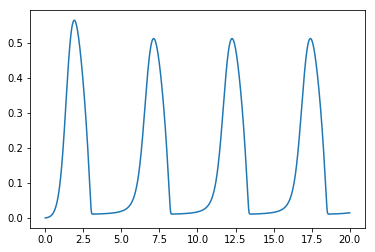

1000


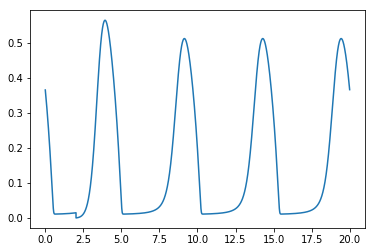

In [148]:
plt.plot(t, u_concentration[1])
plt.show()
print(len(u_concentration))
A = []
C = u_concentration[1].copy()
timestep = np.linspace(0, 200, 201)
for i in timestep: #timestep:
    #phi = i/(max(timestep)) * 2*np.pi
    B = np.roll(C, 10, axis=0)
    A.append(B.copy())
    C = B

plt.figure()
plt.plot(t, A[100])
plt.show()

In [146]:
print(A)



[array([1.47370366e-02, 0.00000000e+00, 1.00724813e-05, ...,
       1.46995299e-02, 1.47119913e-02, 1.47244935e-02]), array([0.01472449, 0.01473704, 0.        , ..., 0.01468711, 0.01469953,
       0.01471199]), array([0.01471199, 0.01472449, 0.01473704, ..., 0.01467473, 0.01468711,
       0.01469953]), array([0.01469953, 0.01471199, 0.01472449, ..., 0.01466239, 0.01467473,
       0.01468711]), array([0.01468711, 0.01469953, 0.01471199, ..., 0.01465009, 0.01466239,
       0.01467473]), array([0.01467473, 0.01468711, 0.01469953, ..., 0.01463783, 0.01465009,
       0.01466239]), array([0.01466239, 0.01467473, 0.01468711, ..., 0.01462561, 0.01463783,
       0.01465009]), array([0.01465009, 0.01466239, 0.01467473, ..., 0.01461343, 0.01462561,
       0.01463783]), array([0.01463783, 0.01465009, 0.01466239, ..., 0.01460129, 0.01461343,
       0.01462561]), array([0.01462561, 0.01463783, 0.01465009, ..., 0.01458918, 0.01460129,
       0.01461343]), array([0.01461343, 0.01462561, 0.01463783, ..

20.0
[array([3, 0, 1, 2]), array([2, 3, 0, 1]), array([1, 2, 3, 0])]


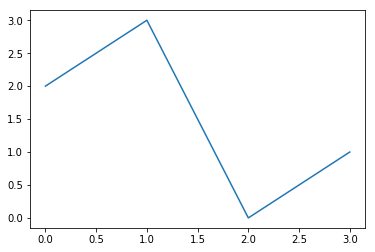

In [139]:
print(max(timestep))
#plt.plot(t, time_roll[][])
#plt.show()
A = []
B = []
C = [0,1,2,3]
for i in range(3):
    B = np.roll(C, 1, axis=0)
    A.append(B)
    C = B
print(A)
plt.plot(np.arange(0,4,1), A[1])